In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [3]:
df=pd.read_csv('/kaggle/input/fruit-data-with-colours/fruit_data_with_colours.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [49]:
features=['height','width']
X=df[features].values
y=df['fruit_label'].values
y = y==1
y=y.astype('int32')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(C=100)
logistic_model.fit(scaled_X_train,y_train)
print('training_score ',logistic_model.score(scaled_X_train,y_train))
print('testing_score ',logistic_model.score(scaled_X_test,y_test))


training_score  0.7727272727272727
testing_score  0.7333333333333333


In [50]:
from sklearn.svm import LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(scaled_X_train,y_train)
print('training_score ',linear_svc.score(scaled_X_train,y_train))
print('testing_score ',linear_svc.score(scaled_X_test,y_test))

training_score  0.7272727272727273
testing_score  0.6666666666666666


<IPython.core.display.Javascript object>


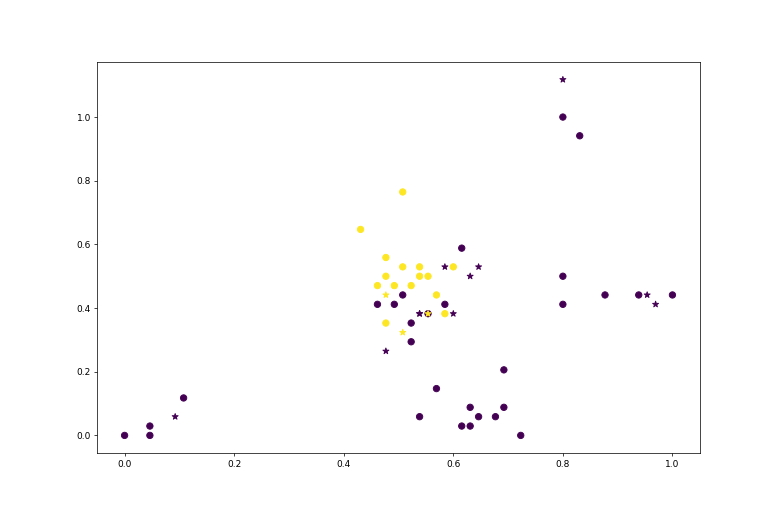

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(scaled_X_train[:,0],scaled_X_train[:,1],c=y_train,marker='o',s=50)
plt.scatter(scaled_X_test[:,0],scaled_X_test[:,1],c=y_test,marker='*',s=50)
plt.show()

In [91]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',gamma=1.1,C=1)
svc.fit(scaled_X_train,y_train)
print('training_score ',svc.score(scaled_X_train,y_train))
print('testing_score ',svc.score(scaled_X_test,y_test))

training_score  0.8636363636363636
testing_score  0.8666666666666667


In [95]:
from sklearn.model_selection import cross_val_score
svc1=SVC()
score=cross_val_score(svc1,X,y,cv=3)
print(score)
print(score.mean(),score.std())

[0.85       0.45       0.73684211]
0.6789473684210526 0.16835250798154144


In [107]:
from sklearn.model_selection import validation_curve
scv2=SVC()
param_range=[1,2,3,4]
train_score,test_score=validation_curve(svc2,X,y,param_name='gamma',param_range=param_range,cv=5)
print('train_score--------------')
print(train_score)
print()
print('test_score ------------------')
print(test_score)
print()
print('-----------------')
print(train_score.mean())

train_score--------------
[[0.82978723 0.93617021 0.91489362 0.80851064 0.83333333]
 [0.82978723 0.91489362 0.91489362 0.80851064 0.83333333]
 [0.82978723 0.91489362 0.91489362 0.80851064 0.83333333]
 [0.82978723 0.93617021 0.91489362 0.80851064 0.85416667]]

test_score ------------------
[[0.91666667 0.5        0.5        1.         0.90909091]
 [0.83333333 0.5        0.41666667 1.         0.90909091]
 [0.75       0.5        0.5        1.         0.90909091]
 [0.75       0.58333333 0.5        1.         0.90909091]]

-----------------
0.8634530141843972


# Decision Tree


In [131]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
tree_clf=DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
print('train_score  ',tree_clf.score(X_train,y_train))
print('test_score  ',tree_clf.score(X_test,y_test))
print(tree_clf.feature_importances_)

train_score   0.9821428571428571
test_score   0.9736842105263158
[0.         0.         0.08385148 0.91614852]
